In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files
import math
from PIL import Image
from io import BytesIO
from PIL import Image
import urllib
from matplotlib import image
from PIL import Image, ImageOps

In [2]:
uploaded = files.upload()
im1 = Image.open(BytesIO(uploaded['train.jpg']))

Saving train.jpg to train.jpg


In [3]:
uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['test1.png']))

Saving test1.png to test1.png


In [4]:
uploaded = files.upload()
im3 = Image.open(BytesIO(uploaded['test2.png']))

Saving test2.png to test2.png


In [5]:
uploaded = files.upload()
im4 = Image.open(BytesIO(uploaded['test3.png']))

Saving test3.png to test3.png


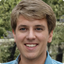

In [6]:
train_image = im1.resize((64,64),Image.ANTIALIAS)
test_image1 = im2.resize((64,64),Image.ANTIALIAS)
test_image2 = im3.resize((64,64),Image.ANTIALIAS)
test_image3 = im4.resize((64,64),Image.ANTIALIAS)
train_image

In [7]:
train_image = ImageOps.grayscale(train_image)
test_image1 = ImageOps.grayscale(test_image1)
test_image2 = ImageOps.grayscale(test_image2)
test_image3 = ImageOps.grayscale(test_image3)

In [8]:
pix_val1 = list(train_image.getdata())
pix_val2 = list(test_image1.getdata())
pix_val3 = list(test_image2.getdata())
pix_val4 = list(test_image3.getdata())

threshold=sum(pix_val1)/len(pix_val1)

In [9]:
vector1=np.zeros(len(pix_val1))
vector2=np.zeros(len(pix_val1))
vector3=np.zeros(len(pix_val1))
vector4=np.zeros(len(pix_val1))

for i in range(len(pix_val1)):
  if pix_val1[i] > threshold:
    vector1[i]=1
  if pix_val1[i] < threshold:
    vector1[i]=-1
  if pix_val2[i] > threshold:
    vector2[i]=1
  if pix_val2[i] < threshold:
    vector2[i]=-1
  if pix_val3[i] > threshold:
    vector3[i]=1
  if pix_val3[i] < threshold:
    vector3[i]=-1
  if pix_val4[i] > threshold:
    vector4[i]=1
  if pix_val4[i] < threshold:
    vector4[i]=-1
  
  vector1=vector1.astype(int)
  vector2=vector2.astype(int)
  vector3=vector3.astype(int)
  vector4=vector4.astype(int)

In [10]:
print(vector1)
print(vector2)
print(vector3)
print(vector4)

[ 1  1 -1 ...  1  1  1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[ 1  1 -1 ...  1  1  1]


In [11]:
new_img=vector4.reshape((64,64))

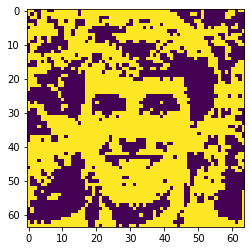

In [12]:
plt.imshow(new_img)

In [17]:
def product(x,y):
    result=np.zeros((4096,4096))
    for i in range(4096):
        result[i,:]=x[i]*y
    return result

In [14]:
def activation_function(x):
    res=[]
    for i in range(len(x)):
        if x[i]>0:
            res.append(1)
        
        if x[i]<=0:
            res.append(-1)
    return res

In [15]:
x_train=np.zeros((1,4096))
x_test=np.zeros((3,4096))
y_train=np.zeros((1,4096))
y_test=np.zeros((3,4096))
x_train[0,:]=vector1
x_test[0,:]=vector2
x_test[1,:]=vector3
x_test[2,:]=vector4
y_train[0,:]=vector1
y_test[0,:]=vector2
y_test[1,:]=vector3
y_test[2,:]=vector4
product=np.zeros((4096,4096))

In [18]:
W_Discrete_Hopfield_Network=product(x_train[0],y_train[0])
W_Discrete_Hopfield_Network=W_Discrete_Hopfield_Network.astype(int)
W_Discrete_Hopfield_Network

array([[ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1, -1, -1],
       ...,
       [ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1]])

In [24]:
def hopfield_Network(test_image,W_Discrete_Hopfield_Network):
  iteration_Num=4096
  hamming_distance_vector=[]
  result=test_image.copy()
  for i in range(iteration_Num):
    yi=test_image[i]+np.dot(result,W_Discrete_Hopfield_Network[:,i])
    if yi > 0 :
      result[i]=1
    if yi < 0 :
      result[i]=-1
    hamming_distance_vector.append(sum(abs(result-vector1))/2)
    if i%1024==0:
      new_img=result.reshape((64,64))
      plt.imshow(new_img)
      plt.show()
  return hamming_distance_vector,result

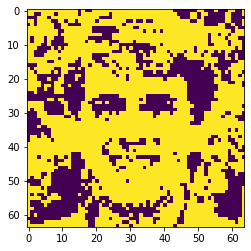

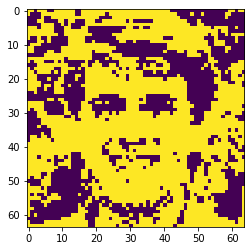

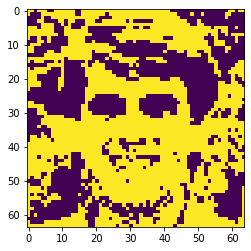

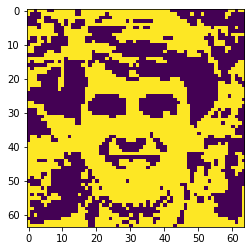

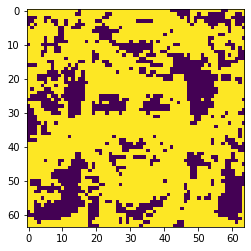

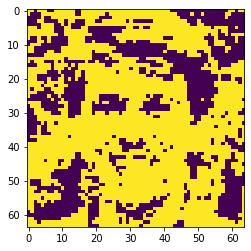

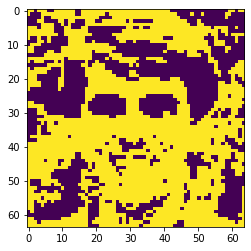

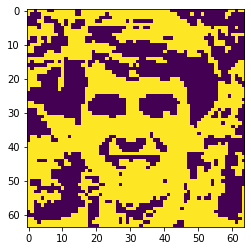

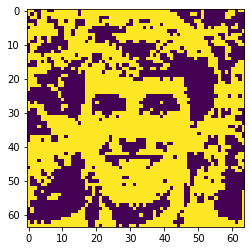

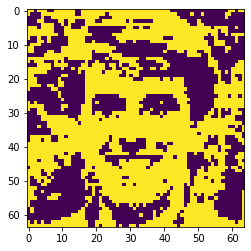

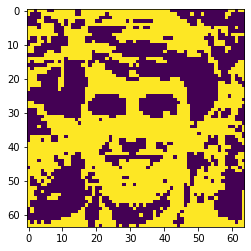

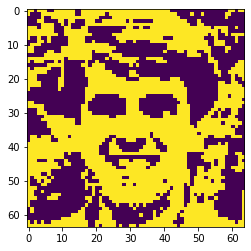

In [25]:
hamming_distance_vector1,result1=hopfield_Network(vector2,W_Discrete_Hopfield_Network)
hamming_distance_vector2,result2=hopfield_Network(vector3,W_Discrete_Hopfield_Network)
hamming_distance_vector3,result3=hopfield_Network(vector4,W_Discrete_Hopfield_Network)

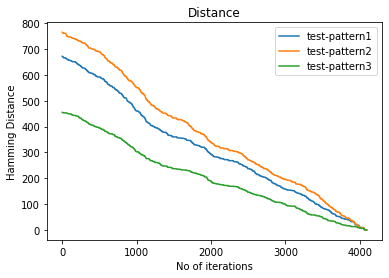

In [28]:
plt.plot(hamming_distance_vector1)
plt.plot(hamming_distance_vector2)
plt.plot(hamming_distance_vector3)
plt.title('Distance')
plt.ylabel('Hamming Distance')
plt.xlabel('No of iterations')
plt.legend(['test-pattern1','test-pattern2','test-pattern3'])
plt.show()